In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
from numpy import cov
from scipy.stats import linregress
from scipy.stats import pearsonr

# Nebraska

In [3]:
# Files to open
nebraska_overdose = pd.read_csv("csv_series/overdose_Nebraska.csv")
nebraska_unemployment = pd.read_csv("csv_series/unemployment_states27.csv")
nebraska_earnings = pd.read_csv("csv_series/earnings_states27.csv")


In [4]:
nebraska_overdose.head()
nebraska_overdose = nebraska_overdose.sort_values(["Year"], ascending=False)
nebraska_overdose.head()

,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
7,Nebraska,2015,6.9,NaN,3.1,NaN,-0.04,NaN,-0.03,NaN
0,Nebraska,2014,7.2,NaN,3.2,NaN,0.11,NaN,0.45,NaN
13,Nebraska,2013,6.5,NaN,2.2,NaN,-0.18,NaN,-0.27,NaN
14,Nebraska,2012,7.9,NaN,3.0,NaN,0.11,NaN,0.07,NaN
1,Nebraska,2011,7.1,NaN,2.8,NaN,0.06,NaN,-0.18,NaN


In [5]:
nebraska_unemployment.head()

,state_id,year,unemployment_rate
0,27,2018,2.8
1,27,2017,2.9
2,27,2016,3.1
3,27,2015,3.0
4,27,2014,3.0


In [6]:
nebraska_earnings.head()

,state_id,year,earnings,pct_change
0,27,2018,816876,0.7
1,27,2017,811496,0.5
2,27,2016,807525,1.0
3,27,2015,799388,1.6
4,27,2014,786807,1.6


In [7]:
combined_unemp_earn = pd.merge(nebraska_unemployment, nebraska_earnings, how="outer", on=['year'])
combined_unemp_earn.head()

,state_id_x,year,unemployment_rate,state_id_y,earnings,pct_change
0,27,2018,2.8,27.0,816876.0,0.7
1,27,2017,2.9,27.0,811496.0,0.5
2,27,2016,3.1,27.0,807525.0,1.0
3,27,2015,3.0,27.0,799388.0,1.6
4,27,2014,3.0,27.0,786807.0,1.6


In [8]:
clean_unemp_earn = combined_unemp_earn[['state_id_x', 'year', 'unemployment_rate', 'earnings', 'pct_change']]
clean_unemp_earn = clean_unemp_earn.rename(columns={"state_id_x":"state", 'year': 'Year'})
clean_unemp_earn.head()

,state,Year,unemployment_rate,earnings,pct_change
0,27,2018,2.8,816876.0,0.7
1,27,2017,2.9,811496.0,0.5
2,27,2016,3.1,807525.0,1.0
3,27,2015,3.0,799388.0,1.6
4,27,2014,3.0,786807.0,1.6


In [9]:
nebraska_combined = pd.merge(clean_unemp_earn, nebraska_overdose, how="outer", on=['Year'])
nebraska_combined_df = nebraska_combined[['Location','Year','unemployment_rate', 'earnings', 'pct_change', 
                                        'All Drug Overdose Death Rate (Age-Adjusted)', 
                                        'Opioid Overdose Death Rate (Age-Adjusted)',
                                        'Percent Change in All Drug Overdose Death Rate from Prior Year', 
                                        'Percent Change in Opioid Overdose Death Rate from Prior Year']]
nebraska_combined_df


,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
0,NaN,2018,2.8,816876.0,0.7,NaN,NaN,NaN,NaN
1,NaN,2017,2.9,811496.0,0.5,NaN,NaN,NaN,NaN
2,NaN,2016,3.1,807525.0,1.0,NaN,NaN,NaN,NaN
3,Nebraska,2015,3.0,799388.0,1.6,6.9,3.1,-0.04,-0.03
4,Nebraska,2014,3.0,786807.0,1.6,7.2,3.2,0.11,0.45
5,Nebraska,2013,3.6,774598.0,1.6,6.5,2.2,-0.18,-0.27
6,Nebraska,2012,4.0,762468.0,2.6,7.9,3.0,0.11,0.07
7,Nebraska,2011,4.2,743476.0,0.9,7.1,2.8,0.06,-0.18
8,Nebraska,2010,4.5,736906.0,-0.8,6.7,3.4,0.14,-0.08
9,Nebraska,2009,4.8,742613.0,-3.2,5.9,3.7,0.07,1.18


In [10]:
nebraska_combined_sort = nebraska_combined_df.sort_values(['Year'], ascending=True)
nebraska_combined_sort.reset_index(drop=True, inplace=True)
nebraska_combined_sort.head()

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
0,Nebraska,1999,NaN,NaN,NaN,2.3,NaN,NaN,NaN
1,Nebraska,2000,2.9,NaN,NaN,2.8,NaN,0.22,NaN
2,Nebraska,2001,3.5,NaN,NaN,3.9,1.9,0.39,NaN
3,Nebraska,2002,3.7,723673.0,-1.6,3.9,1.5,0.00,-0.21
4,Nebraska,2003,3.9,724281.0,0.1,3.2,NaN,-0.18,NaN


In [11]:
nebraska_combined_sort['earnings_index'] = (nebraska_combined_sort['earnings']/nebraska_combined_sort.loc[3,'earnings'])*100
nebraska_combined_sort.head()

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year,earnings_index
0,Nebraska,1999,NaN,NaN,NaN,2.3,NaN,NaN,NaN,NaN
1,Nebraska,2000,2.9,NaN,NaN,2.8,NaN,0.22,NaN,NaN
2,Nebraska,2001,3.5,NaN,NaN,3.9,1.9,0.39,NaN,NaN
3,Nebraska,2002,3.7,723673.0,-1.6,3.9,1.5,0.00,-0.21,100.000000
4,Nebraska,2003,3.9,724281.0,0.1,3.2,NaN,-0.18,NaN,100.084016


In [12]:
nebraska_combined_final = nebraska_combined_sort.dropna()
nebraska_combined_final

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year,earnings_index
3,Nebraska,2002,3.7,723673.0,-1.6,3.9,1.5,0.00,-0.21,100.000000
6,Nebraska,2005,3.5,739567.0,1.3,5.0,2.5,0.39,0.56,102.196296
7,Nebraska,2006,3.0,748399.0,1.2,5.4,1.9,0.08,-0.24,103.416737
8,Nebraska,2007,3.0,761877.0,1.8,4.8,2.4,-0.11,0.26,105.279180
9,Nebraska,2008,3.9,766991.0,0.7,5.5,1.7,0.15,-0.29,105.985853
10,Nebraska,2009,4.8,742613.0,-3.2,5.9,3.7,0.07,1.18,102.617204
11,Nebraska,2010,4.5,736906.0,-0.8,6.7,3.4,0.14,-0.08,101.828588
12,Nebraska,2011,4.2,743476.0,0.9,7.1,2.8,0.06,-0.18,102.736457
13,Nebraska,2012,4.0,762468.0,2.6,7.9,3.0,0.11,0.07,105.360847
14,Nebraska,2013,3.6,774598.0,1.6,6.5,2.2,-0.18,-0.27,107.037018


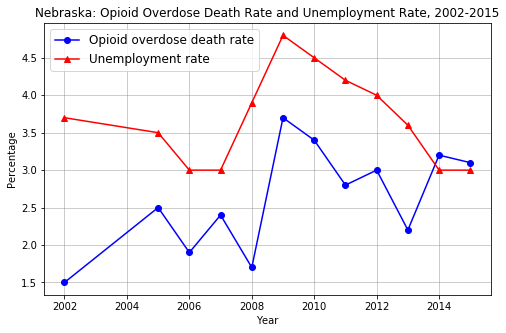

In [14]:
# Generate the plot
fig = plt.figure(figsize=(8,5))

# Create our x_axis list
x_axis = nebraska_combined_final['Year']

# Plot both of these lines so that they will appear on our final chart
overdose_handle, = plt.plot(x_axis, nebraska_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], marker ='o', 
                            color='blue', label='Opioid overdose death rate')
unemployment_handle, = plt.plot(x_axis, nebraska_combined_final['unemployment_rate'], marker='^', 
                                color='red', label="Unemployment rate")

plt.legend(loc='best',fontsize='large')
plt.grid(color='grey', alpha=0.5)

# Set a Title and labels

plt.title("Nebraska: Opioid Overdose Death Rate and Unemployment Rate, 2002-2015")
plt.xlabel("Year")
plt.ylabel("Percentage")
 
plt.savefig("images/Nebraska_overdose_unemployment.png")
plt.show()


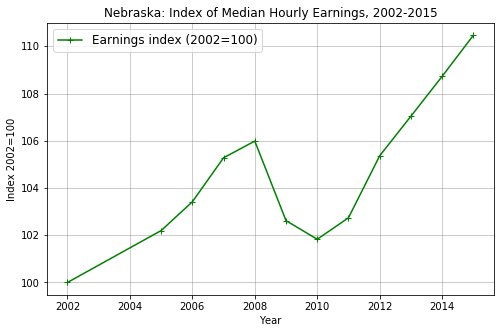

In [15]:
# Generate the plot
fig = plt.figure(figsize=(8,5))

# Create our x_axis list
x_axis = nebraska_combined_final['Year']

earnings_handle, = plt.plot(x_axis, nebraska_combined_final['earnings_index'], marker='+', 
                                 color='green', label="Earnings index (2002=100)")

plt.legend(loc='best',fontsize='large')
plt.grid(color='grey', alpha=0.5)

# Set a Title and labels

plt.title("Nebraska: Index of Median Hourly Earnings, 2002-2015")
plt.xlabel("Year")
plt.ylabel("Index 2002=100")
 
plt.savefig("images/Nebraska_earnings_index.png")
plt.show()

# Correlation between overdose and unemployment

In [23]:
# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(nebraska_combined_final['unemployment_rate'],
                                                        nebraska_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
fit = slope * nebraska_combined_final['unemployment_rate'] + intercept

In [24]:
corr, _ = pearsonr(nebraska_combined_final['unemployment_rate'], nebraska_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.380


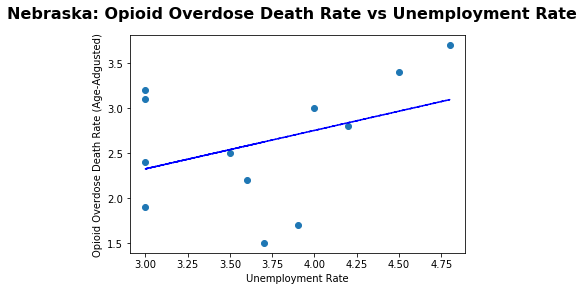

In [25]:
fig, ax = plt.subplots()

fig.suptitle("Nebraska: Opioid Overdose Death Rate vs Unemployment Rate", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Unemployment Rate")
ax.set_ylabel("Opioid Overdose Death Rate (Age-Adgusted)")

ax.plot(nebraska_combined_final['unemployment_rate'], 
        nebraska_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], linewidth=0, marker='o')
ax.plot(nebraska_combined_final['unemployment_rate'], fit, 'b--')

plt.savefig("images/Nebraska_corr_overdose_unemployment.png")
plt.show()

# Correlation between overdose and earnings

In [20]:
# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(nebraska_combined_final['earnings_index'],
                                                        nebraska_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
fit = slope * nebraska_combined_final['earnings_index'] + intercept

In [21]:
corr, _ = pearsonr(nebraska_combined_final['earnings_index'], nebraska_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.199


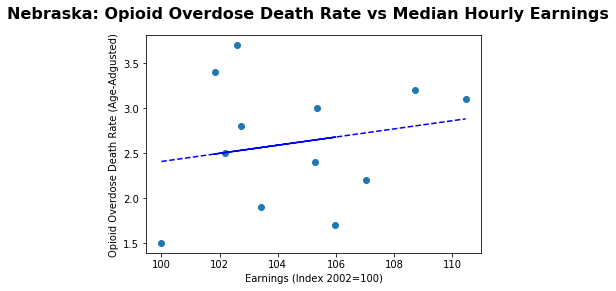

In [22]:
fig, ax = plt.subplots()

fig.suptitle("Nebraska: Opioid Overdose Death Rate vs Median Hourly Earnings", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Earnings (Index 2002=100)")
ax.set_ylabel("Opioid Overdose Death Rate (Age-Adgusted)")

ax.plot(nebraska_combined_final['earnings_index'], 
        nebraska_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], linewidth=0, marker='o')
ax.plot(nebraska_combined_final['earnings_index'], fit, 'b--')

plt.savefig("images/Nebraska_corr_overdose_earnings.png")
plt.show()